In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-8])

In [2]:
import pandas as pd
import numpy as np
from ACME.ACME import ACME 
import time
import shap
import warnings
warnings.filterwarnings("ignore")

In [13]:
glass_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',index_col=[0])
glass_data.columns = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
features = glass_data.drop(columns='Type').columns.to_list()

In [14]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [15]:
X = glass_data.drop('Type',axis=1)
y = glass_data['Type']

In [53]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(glass_data, test_size=0.3, stratify=glass_data['Type'].values, random_state=1234)

In [54]:
from sklearn.neural_network import MLPClassifier

In [75]:
mlp = MLPClassifier(hidden_layer_sizes=(9,15,15,6),max_iter=1000, random_state=678)

In [76]:
mlp.fit(X,y)

MLPClassifier(hidden_layer_sizes=(9, 15, 15, 6), max_iter=1000,
              random_state=678)

In [77]:
mlp.predict(X)

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 5, 1, 5, 5, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 2, 2, 5, 7, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2, 2, 7, 7, 7, 5, 7, 5, 7, 1, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(test['Type'].values, mlp.predict(test[features].values), normalize=True)

0.609375

In [80]:
time_start = time.time()
acme_nn = ACME(mlp, 'Type',K=20, task = 'c')
acme_nn = acme_nn.fit(glass_data)
time.time() - time_start

0.5434267520904541

In [86]:
fig = acme_nn.summary_plot()

In [87]:
fig.write_image('MLP_ACME.pdf')

In [83]:
time_start = time.time()
shap_nn = shap.KernelExplainer(mlp.predict_proba,X)
shap_nn_values = shap_nn.shap_values(X)
time.time() - time_start

Using 213 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/213 [00:00<?, ?it/s]

104.13413977622986

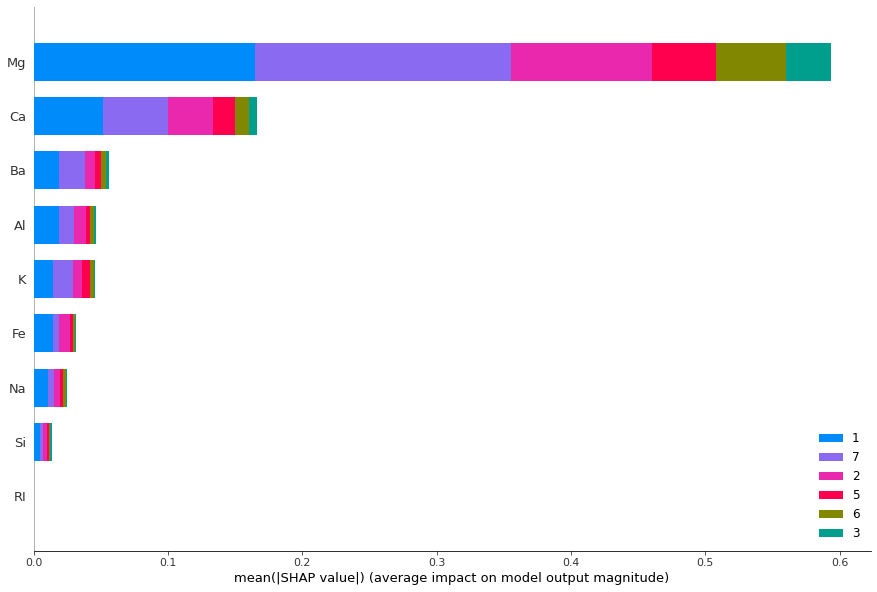

In [84]:
import matplotlib.pyplot as plt
fig = shap.summary_plot(shap_nn_values, X, plot_type ='bar', plot_size=(15,10), class_names = mlp.classes_, show=False)
plt.savefig('MLP_SHAP.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()